In [424]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure
# from PIL import Image

(789, 462, 3)


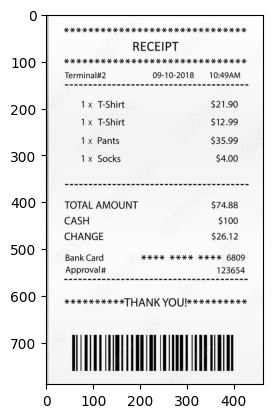

In [425]:
root_path = os.getcwd()
image_path = os.path.join(root_path,'1.jpg')
img = cv2.imread(image_path)
print(img.shape)
plt.imshow(img)

(789, 462)


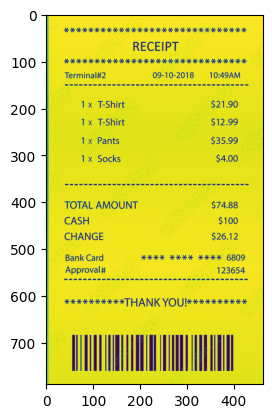

In [426]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img)

In [427]:
img_1 =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

(789, 462)


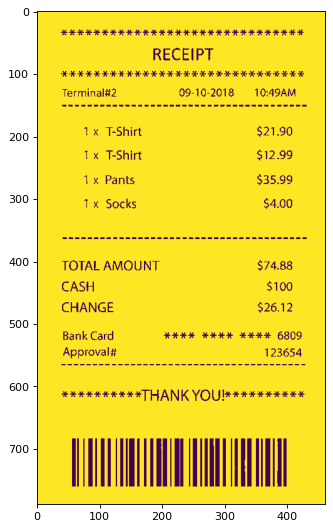

In [428]:
thre_img = cv2.threshold(gray_img,50,100,8)[1]
resized_img = cv2.resize(thre_img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
figure(figsize=(10,8),dpi=80)
print(thre_img.shape)
plt.imshow(thre_img)

In [429]:
# contours, _ = cv2.findContours(resized_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
# cropped = resized_img[y:y+h, x:x+w]
# figure(figsize=(8,8),dpi=80)
# plt.imshow(cropped)

In [430]:
# threshold_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
# resized_img1 = cv2.resize(threshold_img, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

# kernel = np.ones((3,3), np.uint8)
# cleaned = cv2.morphologyEx(resized_img1, cv2.MORPH_OPEN, kernel, iterations=2)

# figure(figsize=(8,8),dpi=80)
# plt.imshow(cleaned)

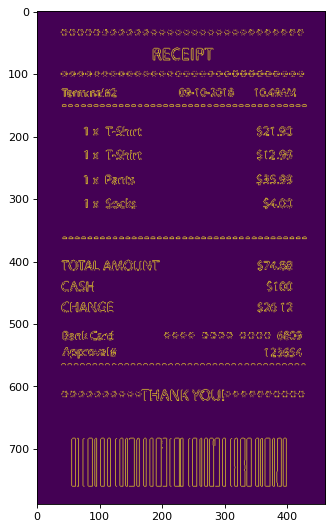

In [431]:
edge = cv2.Canny(thre_img,150,255,None,3)
figure(figsize=(10,8),dpi=80)
plt.imshow(edge)

In [432]:
# sobel_x = cv2.Sobel(thre_img, cv2.CV_64F, 1, 0, ksize=3)
# sobel_y = cv2.Sobel(thre_img, cv2.CV_64F, 0, 1, ksize=3)
# sobel_edge = cv2.magnitude(sobel_x, sobel_y)
# plt.imshow(sobel_edge, cmap='gray')


In [433]:
# laplacian = cv2.Laplacian(thre_img, cv2.CV_64F)
# plt.imshow(laplacian, cmap='gray')


In [434]:
# scharr_x = cv2.Scharr(thre_img, cv2.CV_64F, 1, 0)
# scharr_y = cv2.Scharr(thre_img, cv2.CV_64F, 0, 1)
# scharr_edge = cv2.magnitude(scharr_x, scharr_y)
# plt.imshow(scharr_edge, cmap='gray')


No of lines :  226
[[[ 41 364 430 364]]

 [[ 40 152 430 152]]

 [[ 40 564 427 564]]

 [[ 38 101 426 101]]

 [[ 56 760 398 760]]

 [[112 759 112 685]]

 [[ 38  99 426  99]]

 [[ 41 149 429 149]]

 [[357 759 357 685]]

 [[ 42 361 429 361]]

 [[ 46 614 425 608]]

 [[ 41 362 430 362]]

 [[125 759 125 685]]

 [[ 88 759  88 684]]

 [[379 759 379 684]]

 [[ 40  38 423  32]]

 [[137 759 137 684]]

 [[ 38 100 426 100]]

 [[190 759 190 685]]

 [[ 41  96 424  96]]

 [[393 759 393 685]]

 [[291 759 291 684]]

 [[ 66 759  66 684]]

 [[354 759 354 684]]

 [[ 40 150 430 150]]

 [[ 40  30 421  30]]

 [[296 759 296 685]]

 [[ 39 565 428 565]]

 [[107 759 107 684]]

 [[350 131 411 130]]

 [[111 400 195 401]]

 [[ 73 759  73 685]]

 [[364 706 364 759]]

 [[372 759 372 684]]

 [[390 759 390 684]]

 [[229 759 229 684]]

 [[101 702 101 758]]

 [[155 759 155 684]]

 [[318 683 397 683]]

 [[227 127 313 125]]

 [[342 759 342 684]]

 [[180 759 180 685]]

 [[320 759 320 684]]

 [[198 759 198 684]]

 [[260 759 26

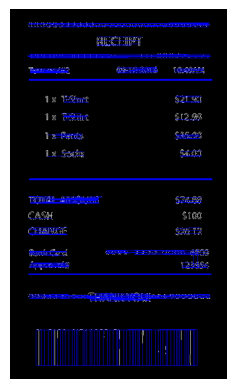

In [435]:
import math

#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

edge_rgb = cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 25 # minimum number of votes (intersections in Hough grid cell)
min_line_length =40 # minimum number of pixels making up a line
max_line_gap = 15  # maximum gap in pixels between connectable line segments
line_image = np.copy(thre_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edge, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(lines))
print(lines)

def filter_lines(lines,min_length=300,angle_threshold=10):
  filtered_lines = []
  for line in lines:
    x1,y1,x2,y2 = line[0]

    length = np.sqrt((y2-y1)**2+(x2-x1)**2)
    if length < min_length:
      continue

    angle = np.arctan2((y2-y1),(x2-x1))*180/np.pi
    if abs(angle)<angle_threshold or abs(angle-180)<angle_threshold:
      filtered_lines.append([x1,y1,x2,y2])

  return np.array(filtered_lines)

filtered_lines = filter_lines(lines)

# for line in filtered_lines:
#   x1,y1,x2,y2 =line
#   cv2.line(edge_rgb,(x1,y1),(x2,y2),(0,255,0),2)#Green lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(edge_rgb, (x1, y1), (x2, y2), (255, 0, 0), 1)#Blue lines

print("No of filtered_lines : ",len(filtered_lines))

plt.imshow(cv2.cvtColor(edge_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [436]:
print(lines[0][0][0])

41


In [437]:
actual_lines = []
actual_points =[]
y_distance = 50

for line in filtered_lines:
    x1, y1, x2, y2 = line

    if len(actual_lines) == 0:
            #add first line point
            actual_lines.append(y1)
            actual_points.append([x1,y1,x2,y2])

    else:
            is_needAdd =True
            for actual_y in actual_lines:
                # first line and second line must be a least y_distance
                if(np.abs(actual_y-y1) < y_distance):
                    is_needAdd = False
                    break

            if is_needAdd:
                actual_lines.append(y1)
                actual_points.append([x1,y1,x2,y2])

print(actual_lines)
print(actual_points)

[364, 152, 564, 101, 760, 614, 38, 684]
[[41, 364, 430, 364], [40, 152, 430, 152], [40, 564, 427, 564], [38, 101, 426, 101], [56, 760, 398, 760], [46, 614, 425, 608], [40, 38, 423, 32], [56, 684, 394, 684]]


In [438]:
lines_total = [
    [41, 364, 430, 364],
    [40, 152, 430, 152],
    [40, 564, 427, 564],
    [38, 101, 426, 101],
    [56, 760, 398, 760],
    [46, 614, 425, 608],
    [40, 38, 423, 32],
    [56, 684, 394, 684]
]

lines_to_remove = [
    [46, 614, 425, 608],
    [56, 760, 398, 760],
    [56, 684, 394, 684]
]

total_filtered_lines = [line for line in lines_total if line not in lines_to_remove]

print(total_filtered_lines)

[[41, 364, 430, 364], [40, 152, 430, 152], [40, 564, 427, 564], [38, 101, 426, 101], [40, 38, 423, 32]]


[[41, 364, 430, 364], [40, 152, 430, 152], [40, 564, 427, 564], [38, 101, 426, 101], [40, 38, 423, 32]]


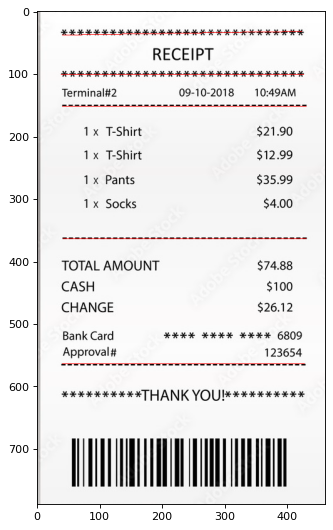

In [439]:
img_output = img.copy()
print(total_filtered_lines)
for x1,y1,x2,y2 in total_filtered_lines:
    cv2.line(img_output,(x1,y1),(x2,y2),(255,0,0),1)
figure(figsize=(10,8),dpi=80)
plt.imshow(img_output)

[38, 101, 426, 101]
(101, 388, 3)


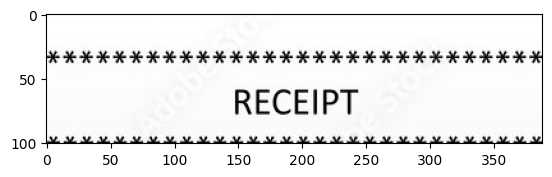

In [440]:
img1 = img_output.copy()

fist_part = total_filtered_lines[3]
print(fist_part)
first_img = img[:fist_part[3],fist_part[0]:fist_part[2],:]
print(first_img.shape)
plt.imshow(first_img)

[40, 152, 430, 152]
(51, 390, 3)


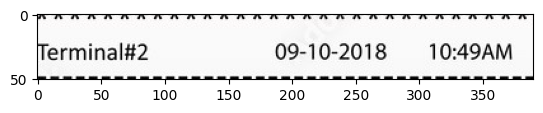

In [441]:
img2 = img_output.copy()
second_part = total_filtered_lines[1]
print(second_part)
second_img = img[fist_part[3]:second_part[3],second_part[0]:second_part[2],:]
print(second_img.shape)
plt.imshow(second_img)

[41, 364, 430, 364]
(212, 389, 3)


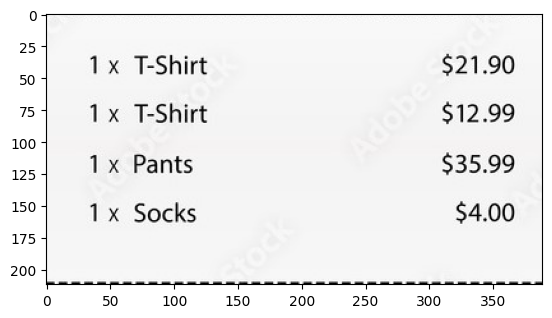

In [442]:
third_part = total_filtered_lines[0]
print(third_part)
third_img = img[second_part[3]:third_part[3],third_part[0]:third_part[2],:]
print(third_img.shape)
plt.imshow(third_img)

[40, 564, 427, 564]
(200, 387, 3)


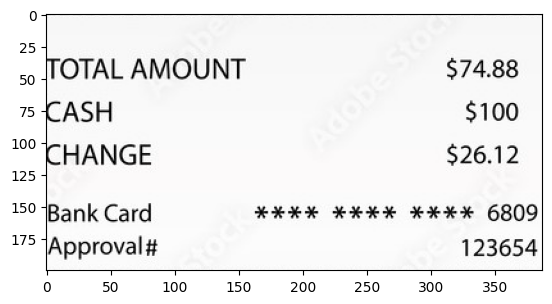

In [443]:
fourth_part = total_filtered_lines[2]
print(fourth_part)
fourth_img = img[third_part[3]:fourth_part[3],fourth_part[0]:fourth_part[2],:]
print(fourth_img.shape)
plt.imshow(fourth_img)

<module 'pytesseract' from '/usr/local/lib/python3.11/dist-packages/pytesseract/__init__.py'>


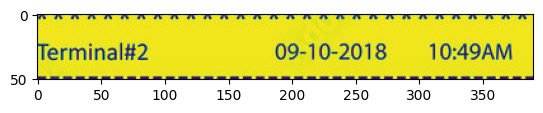

In [447]:
import pytesseract
print(pytesseract)

test_second_img = second_img.copy()

gray_image = cv2.cvtColor(test_second_img, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image)

In [450]:
import easyocr

reader = easyocr.Reader(['en'])

text_from_first_part = reader.readtext(first_img)

extracted_text = " ".join([text[1] for text in text_from_first_part])
print("Text from the first part:")
print(extracted_text)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteText from the first part:
RECEIPT


In [451]:
text_from_second_part = reader.readtext(second_img)

extracted_text_2 = " ".join([text[1] for text in text_from_second_part])
print("Text from the second part:")
print(extracted_text_2)

Text from the second part:
Terminal#2 09-10-2018 10.49AM


In [455]:
text_from_third_part = reader.readtext(third_img)

extracted_text_3 = "/n".join([text[1] for text in text_from_third_part])
print("Text from the third part:")
print(extracted_text_3)

Text from the third part:
1 x T-Shirt/nS21.90/n1 X/nT-Shirt/nS12.99/n1 x Pants/nS35.99/n1 x Socks/nS4.00/n


In [453]:
text_from_fourth_part = reader.readtext(fourth_img)

extracted_text_4 = " ".join([text[1] for text in text_from_fourth_part])
print("Text from the fourth part:")
print(extracted_text_4)

Text from the fourth part:
TOTAL AMOUNT S74.88 CASH S100 CHANGE S26.12 Bank Card ##** **** **** 6809 Approval# 123654 
